<a href="https://colab.research.google.com/github/venkatesh-eranti/MNIST_PCA/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST database of handwritten digits, available from [this page](http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.<br>
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# to build model 
from sklearn.ensemble import RandomForestClassifier
# evaluation of models
from sklearn.metrics import accuracy_score,plot_confusion_matrix
# feature reduction
from sklearn.decomposition import PCA

# loading & understanding the data

In [2]:
ls-lh

total 123M
-rw-r--r-- 1 root root  18M Dec  1 12:00 mnist_test.csv
-rw-r--r-- 1 root root 105M Dec  1 12:15 mnist_train.csv
drwxr-xr-x 1 root root 4.0K Nov 13 17:33 sample_data/


## loading train data as df

In [3]:
df=pd.read_csv('mnist_train.csv')

In [4]:
df.shape

(60000, 785)

In [5]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* there is a label in first column (which represents the digits from 0 $\rightarrow$ 9) 
* each column is represented as 1 pixel (there are 28 X 28 pixels = 785 
columns)
* The values for the pixels are between 0 and 255.

## loading test data as df1

In [6]:
df1=pd.read_csv('mnist_test.csv')

In [7]:
df1.shape

(10000, 785)

In [8]:
df1.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## finding missing values

In [9]:
(df.isna().sum()).sum()

0

## describing the data

In [10]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002100,0.007833,0.003600,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000267,0.000917,0.009283,0.024283,0.043717,0.06410,0.120133,...,3.534933,2.591817,1.701167,1.008600,0.540283,0.238400,0.075267,0.016167,0.000517,0.000983,0.0,0.0,0.0,0.0,0.0,0.0,0.002533,0.015583,0.041633,0.089200,0.128217,0.196733,0.336017,0.429967,0.525983,0.590683,0.688033,0.592067,0.482733,0.343517,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475324,1.361189,0.881816,0.036742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065320,0.194636,1.055011,2.095113,2.962063,3.32388,4.869298,...,26.101169,22.251302,18.107058,13.897102,10.317854,6.552565,3.500306,1.241759,0.114964,0.240866,0.0,0.0,0.0,0.0,0.0,0.0,0.437527,1.721198,2.601220,4.032627,4.776047,6.177880,7.680724,9.093559,9.898373,10.431982,11.403013,10.517303,9.397896,8.057733,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


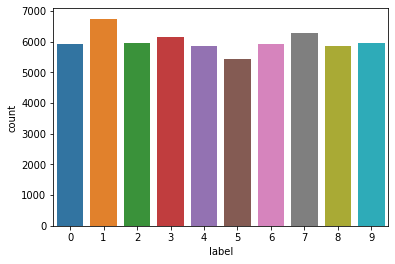

In [11]:
sns.countplot(df['label']);

each digit has roughly 6000 samples

In [12]:
x_train=df.drop('label',axis=1)
y_train=df['label']

In [13]:
x_test=df1.drop('label',axis=1)
y_test=df1['label']

# visualisaing the images

## visualising first 30 rows

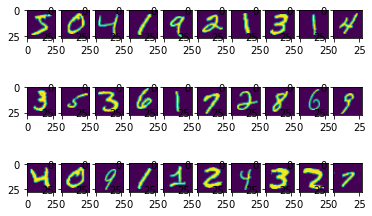

In [14]:
for i in range(0,30):
    plt.subplot(30/10,10,i+1)
    mat_data = x_train.iloc[i].values.reshape(28,28)  #reshape images
    plt.imshow(mat_data) #plot the data

## creating a function to visualise the images

In [15]:
 def show_image(n):
    for i in range(0,n):
        plt.subplot(n/10,10,i+1)
        mat_data = x_train.iloc[i].values.reshape(28,28)  #reshape images
        plt.imshow(mat_data) #plot the data
        plt.xticks([])
        plt.yticks([])

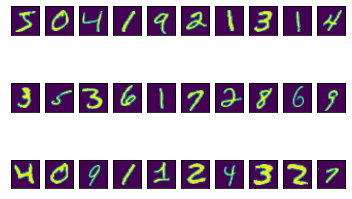

In [16]:
show_image(30)

to see first 50 numbers of any digits

In [17]:
 def show_digit_image(n):
    index=np.where(y_train==n)
    for i in range(0,50):
        plt.subplot(5,10,i+1)
        mat_data = x_train.iloc[index[0][i]].values.reshape(28,28)  #reshape images
        plt.imshow(mat_data) #plot the data
        plt.xticks([])
        plt.yticks([])

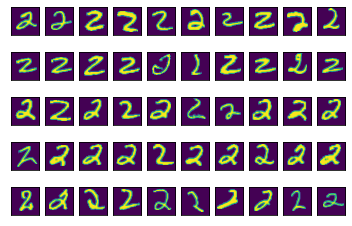

In [18]:
show_digit_image(2)

Let's create a simple model to predict the digits of the images using columns of the train data.

# fitting classification model

In [19]:
clf=RandomForestClassifier()

In [20]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_pred=clf.predict(x_test)

In [22]:
accuracy_score(y_test,y_pred)

0.9695

with all 784 columns the randomforest predicted all digits with 97% accuracy

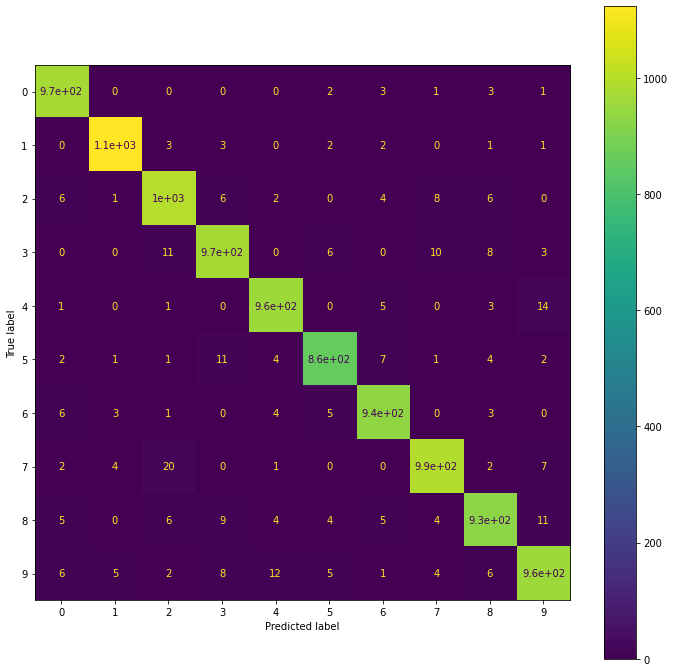

In [23]:
fig,ax=plt.subplots(figsize=(12,12))
plot_confusion_matrix(clf,x_test,y_test,ax=ax);

The above model does pretty well on the test set using all of the data. <br> let's see how well a model can do with a much lower number of features. Perhaps, we can do as well or better by reducing the noise in the original features.

# scaling the model

In [24]:
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
scaled_x_test=scaler.transform(x_test)
scaled_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# fitting PCA

In [26]:
pca=PCA(n_components=2).fit(scaled_x_train)
scaled_x_train_pca=pca.transform(scaled_x_train)
scaled_x_train_pca

array([[-0.92216968, -4.81488738],
       [ 8.70898093, -7.75440564],
       [ 2.3283992 ,  9.43120353],
       ...,
       [-3.77722283, -3.23055309],
       [ 1.72237028, -4.94805632],
       [-1.42723122, -6.17581872]])

In [27]:
scaled_x_train_pca.shape

(60000, 2)

In [28]:
scaled_x_test_pca=pca.transform(scaled_x_test)
scaled_x_test_pca

array([[-5.03128661,  3.64142694],
       [ 3.14576726,  3.00399647],
       [-7.66059437, -1.52485527],
       ...,
       [-5.25453475, -1.24134973],
       [-2.31640953, -7.00151949],
       [11.52557874, -5.50540278]])

In [29]:
clf_pca=RandomForestClassifier()
clf_pca.fit(scaled_x_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
scaled_pca_y_pred=clf_pca.predict(scaled_x_test_pca)

In [31]:
accuracy_score(y_test,scaled_pca_y_pred)

0.3189

clearly only two components isn't giving us enough information to identify the digits

let's check at which point model performs with atlest 90% accuracy

In [32]:
for i in range(2,21):
    pca=PCA(n_components=i).fit(scaled_x_train)
    scaled_x_train_pca=pca.transform(scaled_x_train)
    clf_pca=RandomForestClassifier()
    clf_pca.fit(scaled_x_train_pca,y_train)
    scaled_x_test_pca=pca.transform(scaled_x_test)
    scaled_pca_y_pred=clf_pca.predict(scaled_x_test_pca)
    acc_score=accuracy_score(y_test,scaled_pca_y_pred)
    print(f'with {i} components,the accuracy score is: {acc_score}')
    if acc_score >=0.9:
        break

with 2 components,the accuracy score is: 0.3199
with 3 components,the accuracy score is: 0.5381
with 4 components,the accuracy score is: 0.6856
with 5 components,the accuracy score is: 0.7572
with 6 components,the accuracy score is: 0.8406
with 7 components,the accuracy score is: 0.8525
with 8 components,the accuracy score is: 0.8737
with 9 components,the accuracy score is: 0.8894
with 10 components,the accuracy score is: 0.9062


with only 10 columns of out of 784 columns the model performed with more than 90 % accuracy which is impressive

In [ ]:
for i in range(2,21):
    pca=PCA(n_components=i).fit(scaled_x_train)
    scaled_x_train_pca=pca.transform(scaled_x_train)

In [36]:
for i in range(2,20):
    pca=PCA(n_components=i).fit(scaled_x_train)
    print(f'Expalined variance ratio with {i} components are: ',np.cumsum(pca.explained_variance_ratio_)[-1])

Expalined variance ratio with 2 components are:  0.09724988901851692
Expalined variance ratio with 3 components are:  0.13464369244661528
Expalined variance ratio with 4 components are:  0.1634948254922615
Expalined variance ratio with 5 components are:  0.18870588669555588
Expalined variance ratio with 6 components are:  0.2106485316672345
Expalined variance ratio with 7 components are:  0.22988195611959458
Expalined variance ratio with 8 components are:  0.2473376646969737
Expalined variance ratio with 9 components are:  0.2626873186402628
Expalined variance ratio with 10 components are:  0.27670764946272325
Expalined variance ratio with 11 components are:  0.2901123286914373
Expalined variance ratio with 12 components are:  0.3021575684893897
Expalined variance ratio with 13 components are:  0.31329159431904846
Expalined variance ratio with 14 components are:  0.32417251472914876
Expalined variance ratio with 15 components are:  0.3344772178183576
Expalined variance ratio with 16 co

In [40]:
i=150
pca=PCA(n_components=i).fit(scaled_x_train)
print(f'Expalined variance ratio with {i} components are: ',np.cumsum(pca.explained_variance_ratio_)[-1])

Expalined variance ratio with 150 components are:  0.8002932895671998


It needs atleast 150 features out of 784 to get 80 % of explained variance ratio.